In [199]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [200]:
pd.set_option("display.max_column",100)
pd.set_option("expand_frame_repr",False)

In [201]:
train_file=r"D:\文件\学习\数据集\二手车交易\used_car_train_20200313\used_car_train_20200313.csv"
test_file=r"D:\文件\学习\数据集\二手车交易\used_car_testB_20200421\used_car_testB_20200421.csv"
train_data=pd.read_csv(train_file,sep=" ")
test_data=pd.read_csv(test_file,sep=" ")

In [223]:
train_data.head(3)

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,notRepairedDamage,regionCode,seller,offerType,creatDate,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,0.0,1046,0,0,20160404,43.357796,3.966344,0.050257,2.159744,1.143786,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,0.0,4366,0,0,20160309,45.305273,5.236112,0.137925,1.380657,-1.422165,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,0.0,2806,0,0,20160402,45.978359,4.823792,1.319524,-0.998467,-0.996911,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963


In [224]:
test_data.head(3)

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,notRepairedDamage,regionCode,seller,offerType,creatDate,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,200000,133777,20000501,67.0,0,1.0,0.0,0.0,101,15.0,0.0,5019,0,0,20160308,42.142061,-3.094739,-0.721300,1.466344,1.009846,0.236520,0.000241,0.105319,0.046233,0.094522,3.619512,-0.280607,-2.019761,0.978828,0.803322
1,200001,61206,19950211,19.0,6,2.0,0.0,0.0,73,6.0,0.0,1505,0,0,20160310,43.907034,-3.244605,-0.766430,1.276718,-1.065338,0.261518,0.000000,0.120323,0.046784,0.035385,2.997376,-1.406705,-1.020884,-1.349990,-0.200542
2,200002,67829,20090606,5.0,5,4.0,0.0,0.0,120,5.0,0.0,1776,0,0,20160309,45.389665,3.372384,-0.965565,-2.447316,0.624268,0.261691,0.090836,0.000000,0.079655,0.073586,-3.951084,-0.433467,0.918964,1.634604,1.027173


### 数据字典

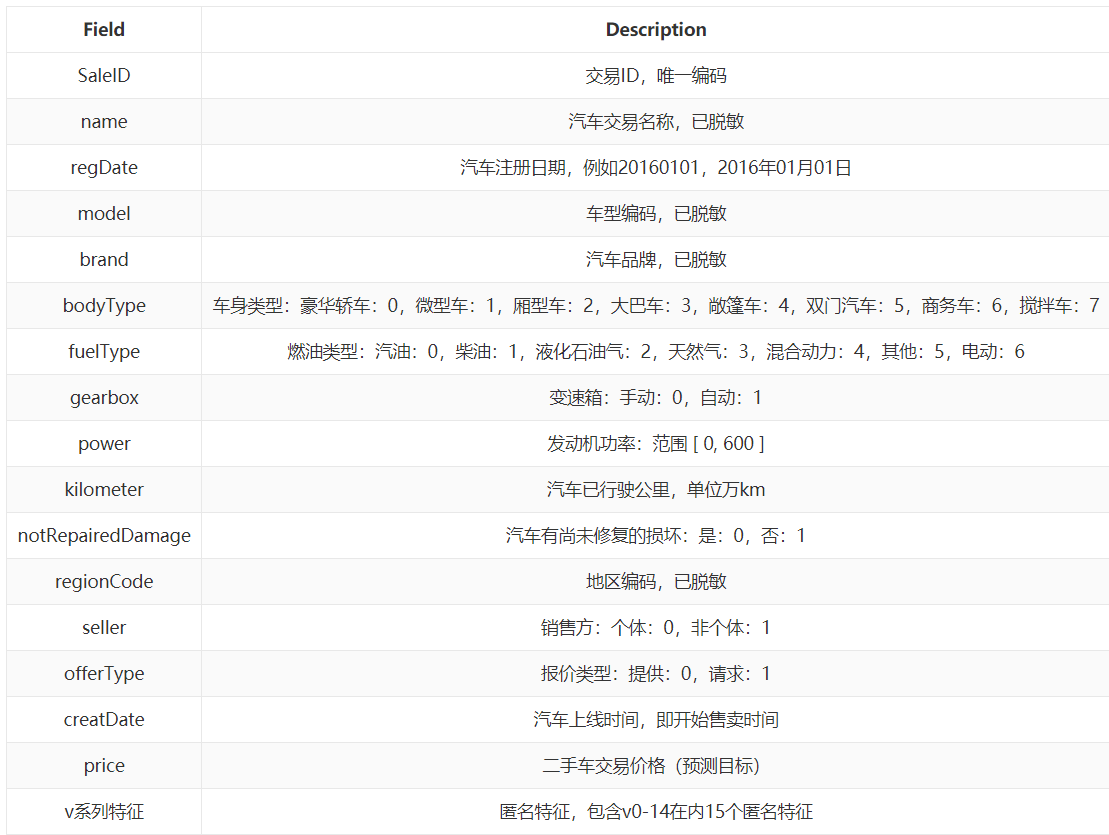

## 1数据探索

In [220]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149999 entries, 0 to 149999
Data columns (total 30 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SaleID             149999 non-null  int64  
 1   name               149999 non-null  int64  
 2   regDate            149999 non-null  int64  
 3   model              149999 non-null  float64
 4   brand              149999 non-null  int64  
 5   bodyType           149999 non-null  float64
 6   fuelType           149999 non-null  float64
 7   gearbox            149999 non-null  float64
 8   power              149999 non-null  int64  
 9   kilometer          149999 non-null  float64
 10  notRepairedDamage  149999 non-null  float64
 11  regionCode         149999 non-null  int64  
 12  seller             149999 non-null  int64  
 13  offerType          149999 non-null  int64  
 14  creatDate          149999 non-null  int64  
 15  v_0                149999 non-null  float64
 16  v_

In [221]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SaleID             50000 non-null  int64  
 1   name               50000 non-null  int64  
 2   regDate            50000 non-null  int64  
 3   model              50000 non-null  float64
 4   brand              50000 non-null  int64  
 5   bodyType           50000 non-null  float64
 6   fuelType           50000 non-null  float64
 7   gearbox            50000 non-null  float64
 8   power              50000 non-null  int64  
 9   kilometer          50000 non-null  float64
 10  notRepairedDamage  50000 non-null  float64
 11  regionCode         50000 non-null  int64  
 12  seller             50000 non-null  int64  
 13  offerType          50000 non-null  int64  
 14  creatDate          50000 non-null  int64  
 15  v_0                50000 non-null  float64
 16  v_1                500

In [206]:
#数据清洗
#缺失值
train_data["bodyType"].isnull().sum()/len(train_data)

train_data["fuelType"].isnull().sum()/len(train_data)

train_data["gearbox"].isnull().sum()/len(train_data)

test_data["bodyType"].isnull().sum()/len(test_data)

test_data["fuelType"].isnull().sum()/len(test_data)

test_data["gearbox"].isnull().sum()/len(test_data)

train_data=train_data.dropna(subset=["model"],axis=0)

In [207]:
label=train_data["price"]
train_data=train_data.drop("price",axis=1)

In [209]:
train_data["notRepairedDamage"].value_counts()

0.0    111360
-       24324
1.0     14315
Name: notRepairedDamage, dtype: int64

In [210]:
train_data["notRepairedDamage"]=train_data["notRepairedDamage"].replace("-","0.0")
test_data["notRepairedDamage"]=test_data["notRepairedDamage"].replace("-","0.0")

In [212]:
train_data["bodyType"].value_counts()

0.0    41420
1.0    35272
2.0    30324
3.0    13491
4.0     9609
5.0     7607
6.0     6481
7.0     1289
Name: bodyType, dtype: int64

In [213]:
#用众数填充缺失值
train_data["bodyType"]=train_data["bodyType"].fillna(train_data["bodyType"].median())

train_data["fuelType"]=train_data["fuelType"].fillna(train_data["fuelType"].median())

train_data["gearbox"]=train_data["gearbox"].fillna(train_data["gearbox"].median())

test_data["gearbox"]=test_data["gearbox"].fillna(test_data["gearbox"].median())

test_data["fuelType"]=test_data["fuelType"].fillna(test_data["fuelType"].median())

test_data["gearbox"]=test_data["gearbox"].fillna(test_data["gearbox"].median())

test_data["bodyType"]=test_data["bodyType"].fillna(test_data["bodyType"].median())

In [214]:
train_data["bodyType"].value_counts()

0.0    41420
1.0    39778
2.0    30324
3.0    13491
4.0     9609
5.0     7607
6.0     6481
7.0     1289
Name: bodyType, dtype: int64

C:\Users\xiongyuan\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\xiongyuan\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\xiongyuan\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\xiongyuan\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\xiongyuan\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\xiongyuan\anaconda3\lib\site-packages\seaborn\distributions.p

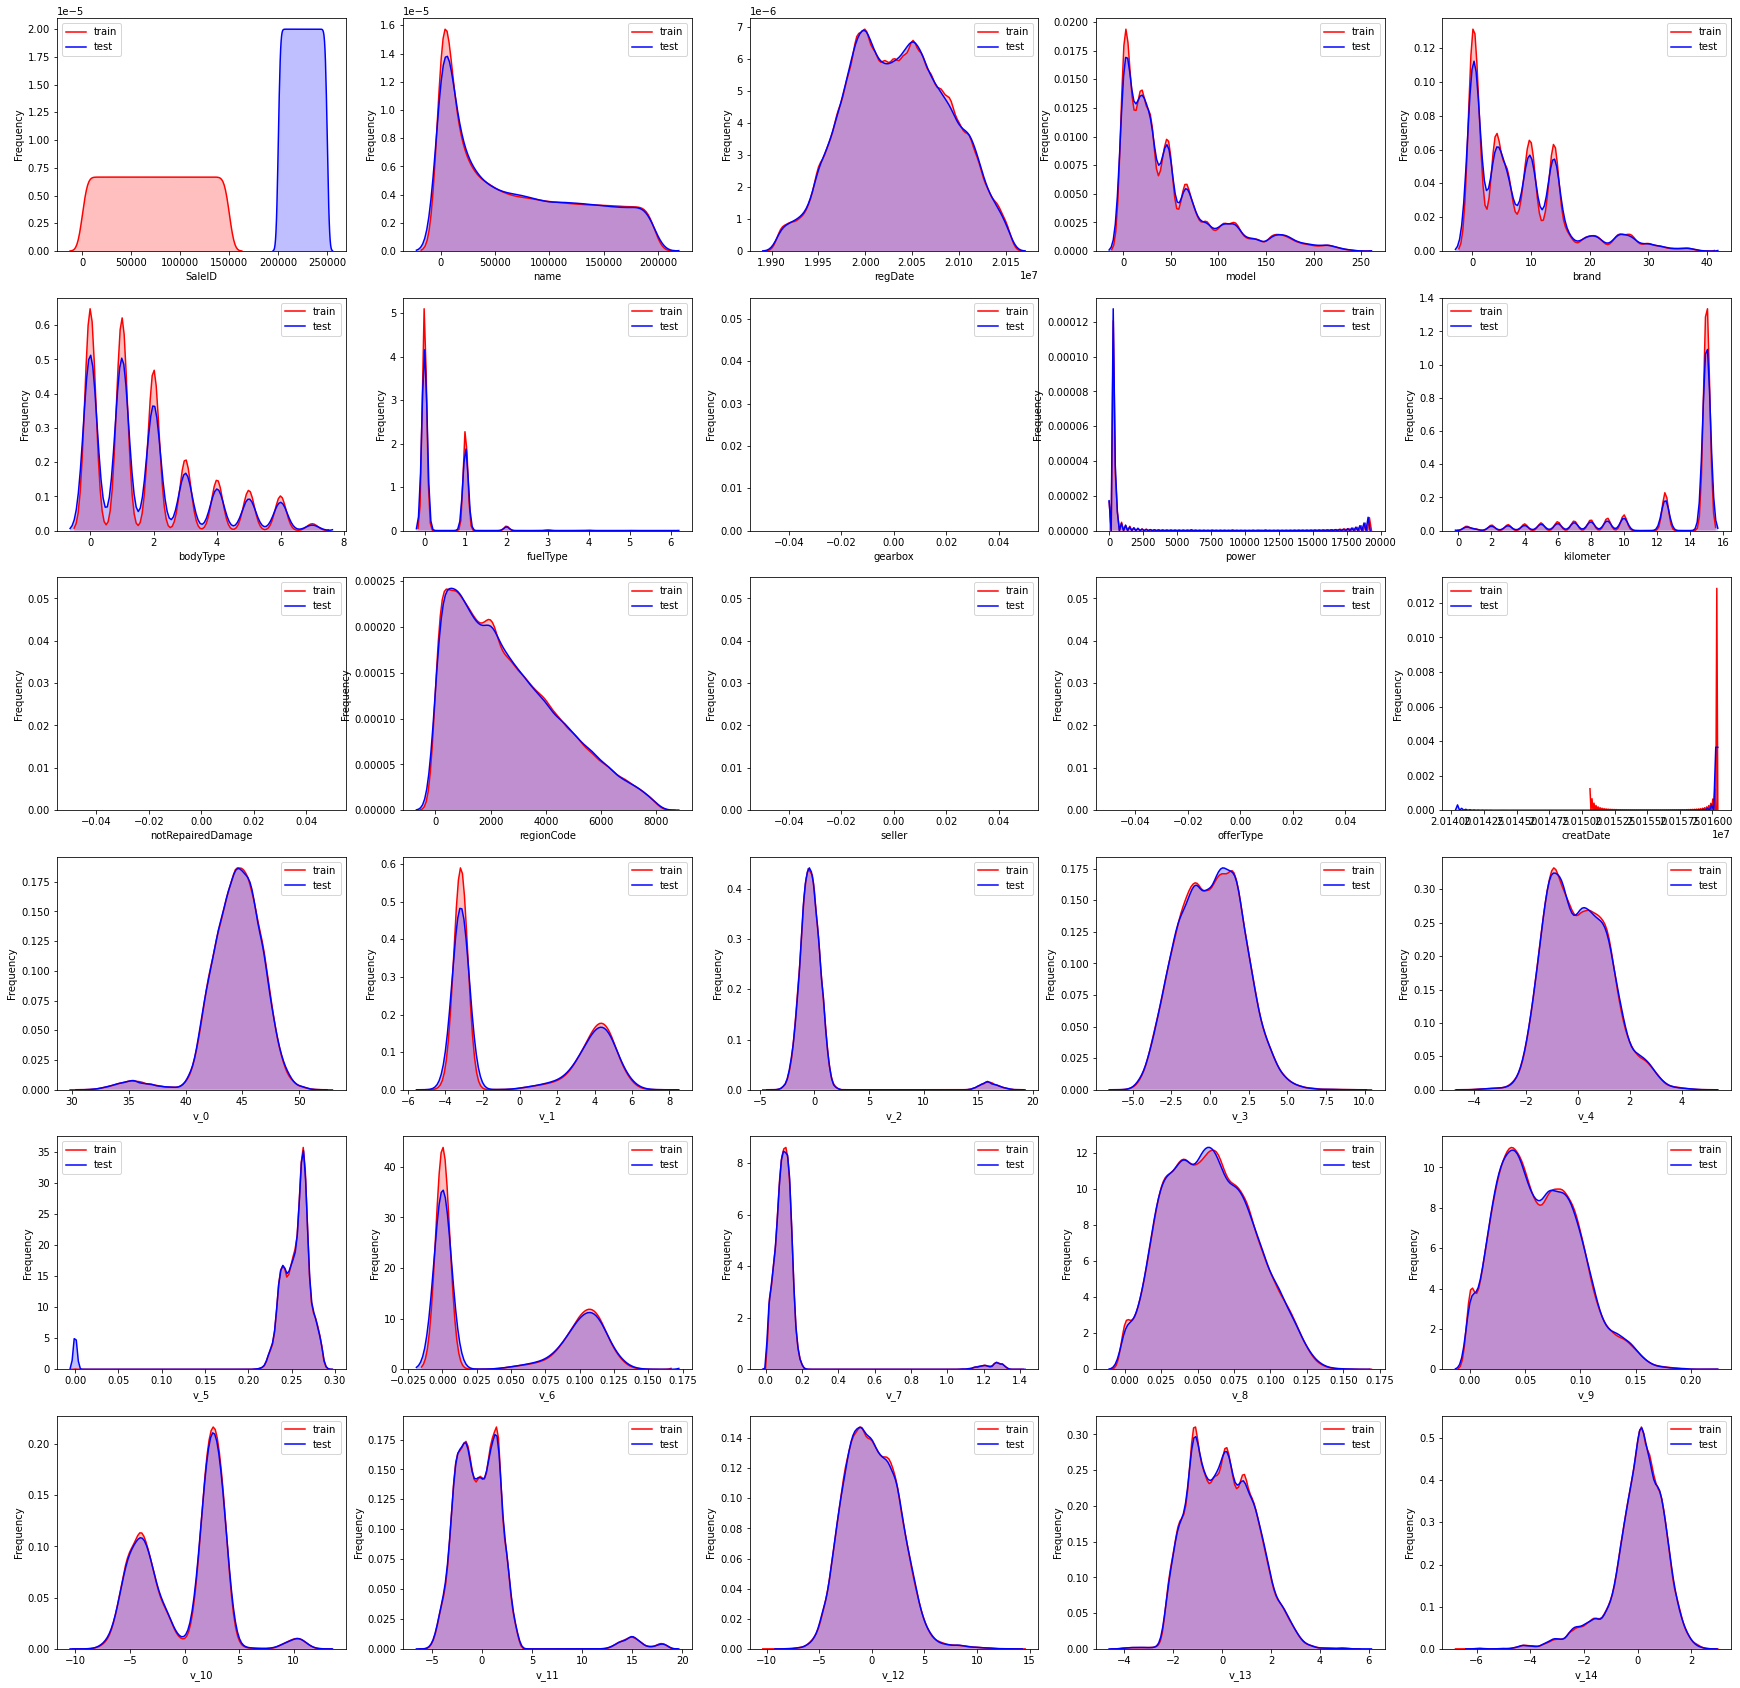

In [217]:
# plt.figure(figsize=(30,30))
# i=1
# for col in train_data.columns:
#     ax=plt.subplot(6,5,i)
#     ax=sns.kdeplot(train_data[col],color="Red",shade=True)
#     ax=sns.kdeplot(test_data[col],color="Blue",shade=True)
#     ax.set_xlabel(col)
#     ax.set_ylabel("Frequency")
#     ax=ax.legend(["train","test"])
#     i=i+1
# plt.show()

In [219]:
train_data=train_data.astype({"notRepairedDamage":float})
test_data=test_data.astype({"notRepairedDamage":float})

C:\Users\xiongyuan\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\xiongyuan\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\xiongyuan\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\xiongyuan\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


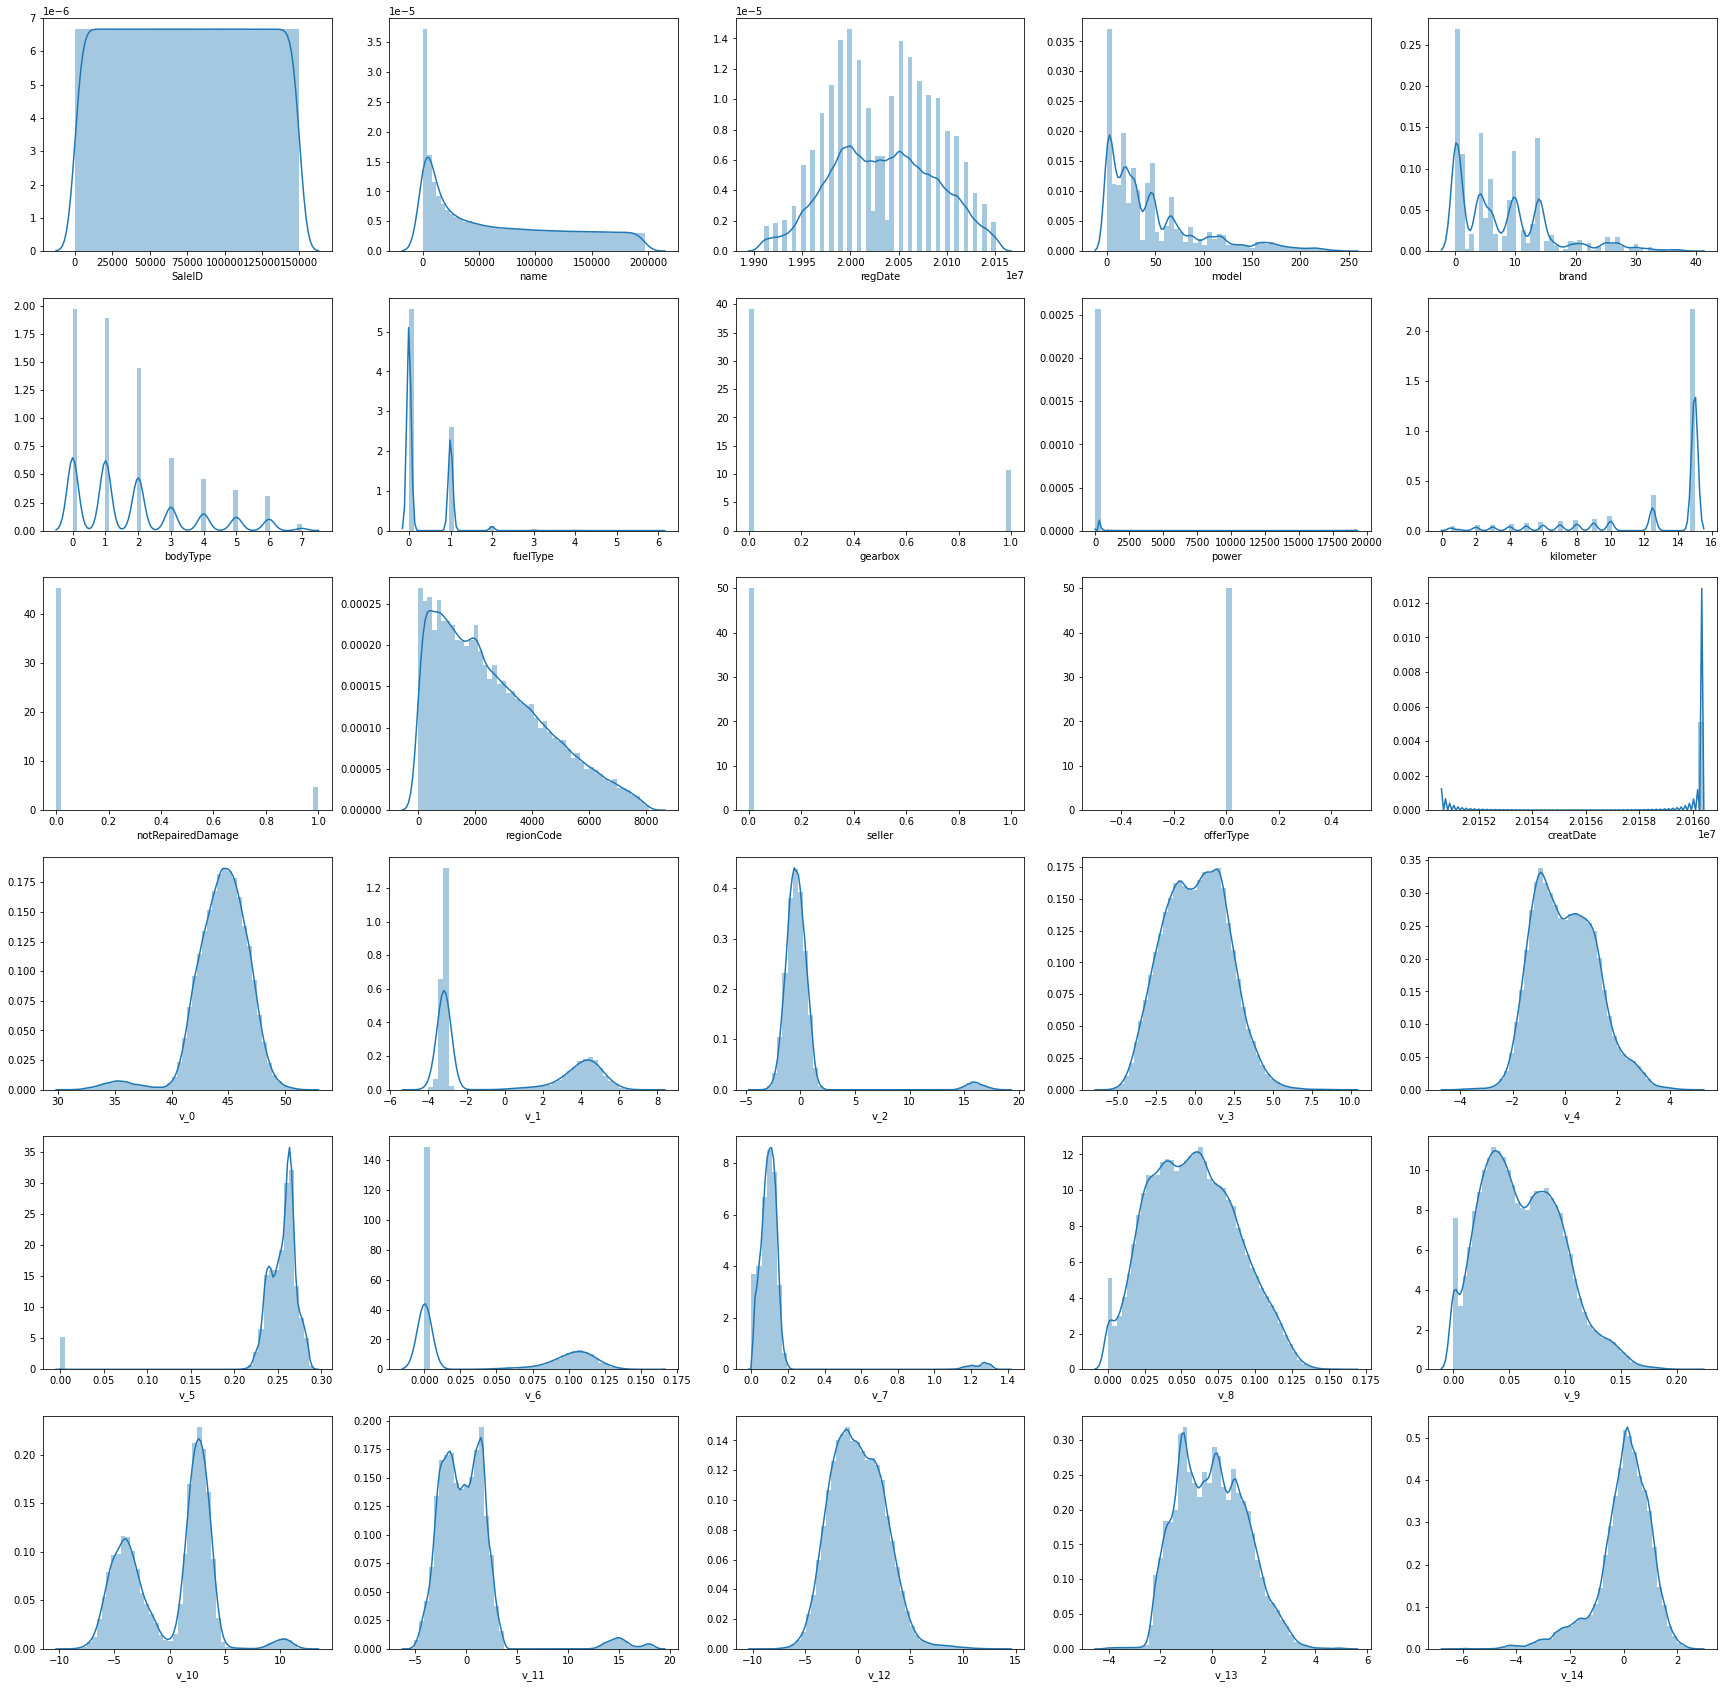

In [225]:
plt.figure(figsize=(30,30))
i=1
for column in train_data.columns:
    plt.subplot(6,5,i)
    sns.distplot(train_data[column])
    i=i+1
plt.show()

In [229]:
train_data.to_csv(r"D:\文件\学习\数据集\二手车交易\trainDataAfterCleaning.csv",index=False)
test_data.to_csv(r"D:\文件\学习\数据集\二手车交易\testDataAfterCleaning.csv",index=False)

In [226]:
train_data=pd.concat([train_data,label],axis=1)